# 1. Reorganise folders

Tensorflow image loading allows for the creation of a generator object, instead of loading the entire dataset into RAM in one go. Instead, only enough number of images are read into RAM and provided into Tensorflow for training. While this batch is training, the second batch of images are loaded and can be transferred into GPU as needed.

This step is especially important since most GPUs have a memory of 16 GB (check AWS specs). The entire dataset for MMID is already XX GB after un-tar. Reading datasets into memory in from disk one go is also slow, and this problem can become slower if the datasets are located on a distributed file system (is S3 a distributed FS?). A100 NVIDIA has 80 GB GPU memory (https://www.nvidia.com/content/dam/en-zz/Solutions/Data-Center/a100/pdf/nvidia-a100-datasheet-nvidia-us-2188504-web.pdf) while T4  and Tesla V100 have 16 GB memory per GPU and K80 only has 12 GB (https://aws.amazon.com/ec2/instance-types/).

By using commodity hardware, including those with previous/low-end GPUs, this image loading/generator technique becomes suitable for CNN.

full data: 976669 items,  20.4 GB
sample data: 48809 items, totalling 1.3 GB

## 1.1 Rename folders from generic number (5721 e.g.) into arabic names

Purpose: to allow image generator function to create labels from folder names
AND, also to allow searching for individual folders later one if needed (e.g. for report writing).

In [1]:
# for each folder, rename to the one in word.txt (arabic name)
#
import os

def rename_folders(path):
    
    # iterate through each folder
    for i in os.listdir(folder_path):
        # ignore the tab-separated label file
        if i.endswith('tsv'):
            continue

        # create paths from folder names and the actual word
        # as given by the individual 'word.txt' file
        full_path = f'{folder_path}/{i}/'
        with open(full_path + 'word.txt') as f:
            file_name = f.read()

        # essentially do a string concatenation
        # and rename the folders
        file_name = f'{folder_path}/{file_name}/'
        os.rename(full_path, file_name)
        print(i, file_name)
    

In [2]:
# rename the mini package
folder_path = '../sample_data/mini-arabic-package'
rename_folders(folder_path)

1827 ../sample_data/mini-arabic-package/الجيدة/
8650 ../sample_data/mini-arabic-package/والأدب/
5689 ../sample_data/mini-arabic-package/خمسة/
6455 ../sample_data/mini-arabic-package/طريقها/
7817 ../sample_data/mini-arabic-package/مجرى/
2093 ../sample_data/mini-arabic-package/الدقيق/
6101 ../sample_data/mini-arabic-package/سلالة/
5938 ../sample_data/mini-arabic-package/روح/
4571 ../sample_data/mini-arabic-package/بلاط/
1398 ../sample_data/mini-arabic-package/البصريات/
8135 ../sample_data/mini-arabic-package/مكتوبة/
4366 ../sample_data/mini-arabic-package/بجامعة/
8286 ../sample_data/mini-arabic-package/ميل/
3294 ../sample_data/mini-arabic-package/اللهجة/
7640 ../sample_data/mini-arabic-package/لمعالجة/
3221 ../sample_data/mini-arabic-package/الكلاسيكي/
3883 ../sample_data/mini-arabic-package/الناجمة/
3203 ../sample_data/mini-arabic-package/الكثيرة/
3670 ../sample_data/mini-arabic-package/المعسكر/
4390 ../sample_data/mini-arabic-package/بحيرة/
8229 ../sample_data/mini-arabic-package/مهمًا

3058 ../sample_data/mini-arabic-package/القبلة/
9655 ../sample_data/mini-arabic-package/يعتبر/
91 ../sample_data/mini-arabic-package/أحد/
2836 ../sample_data/mini-arabic-package/العمق/
2036 ../sample_data/mini-arabic-package/الخليجي/
8104 ../sample_data/mini-arabic-package/مقال/
7468 ../sample_data/mini-arabic-package/لكتاب/
7807 ../sample_data/mini-arabic-package/مثيل/
673 ../sample_data/mini-arabic-package/ارتفاعها/
2162 ../sample_data/mini-arabic-package/الرئاسية/
4065 ../sample_data/mini-arabic-package/الوثائق/
8889 ../sample_data/mini-arabic-package/وانتشر/
5544 ../sample_data/mini-arabic-package/حكمة/
6353 ../sample_data/mini-arabic-package/صغير/
360 ../sample_data/mini-arabic-package/أمكن/
3954 ../sample_data/mini-arabic-package/النظرة/
9169 ../sample_data/mini-arabic-package/وظهرت/
2792 ../sample_data/mini-arabic-package/العظيم/
5856 ../sample_data/mini-arabic-package/رئيسًا/
7190 ../sample_data/mini-arabic-package/كبيرة/
3270 ../sample_data/mini-arabic-package/اللازمة/
3558 ..

6320 ../sample_data/mini-arabic-package/صالح/
3322 ../sample_data/mini-arabic-package/المؤكد/
5536 ../sample_data/mini-arabic-package/حقول/
9689 ../sample_data/mini-arabic-package/يفعل/
8521 ../sample_data/mini-arabic-package/هُوَ/
4932 ../sample_data/mini-arabic-package/تشاد/
4835 ../sample_data/mini-arabic-package/تحميل/
895 ../sample_data/mini-arabic-package/الأساطير/
455 ../sample_data/mini-arabic-package/أولاده/
7727 ../sample_data/mini-arabic-package/ماجد/
3141 ../sample_data/mini-arabic-package/القليلة/
1486 ../sample_data/mini-arabic-package/التاريخي/
5435 ../sample_data/mini-arabic-package/حاز/
359 ../sample_data/mini-arabic-package/أمفورة/
5640 ../sample_data/mini-arabic-package/خسائر/
6470 ../sample_data/mini-arabic-package/طه/
20 ../sample_data/mini-arabic-package/آلات/
4696 ../sample_data/mini-arabic-package/بيوت/
9031 ../sample_data/mini-arabic-package/وجمع/
1488 ../sample_data/mini-arabic-package/التاسع/
3231 ../sample_data/mini-arabic-package/الكمبيوتر/
6867 ../sample_d

3688 ../sample_data/mini-arabic-package/المغناطيسية/
24 ../sample_data/mini-arabic-package/آلهة/
2528 ../sample_data/mini-arabic-package/الشورى/
2635 ../sample_data/mini-arabic-package/الضروري/
4621 ../sample_data/mini-arabic-package/بنظام/
2161 ../sample_data/mini-arabic-package/الرئاسة/
4980 ../sample_data/mini-arabic-package/تصنيفدول/
9060 ../sample_data/mini-arabic-package/وحكم/
1214 ../sample_data/mini-arabic-package/الابتدائية/
4038 ../sample_data/mini-arabic-package/الهنود/
6215 ../sample_data/mini-arabic-package/شاهد/
8640 ../sample_data/mini-arabic-package/وافقت/
2731 ../sample_data/mini-arabic-package/العباسيين/
7320 ../sample_data/mini-arabic-package/لإيجاد/
1948 ../sample_data/mini-arabic-package/الحلم/
8066 ../sample_data/mini-arabic-package/معسكرات/
8598 ../sample_data/mini-arabic-package/وإسبانيا/
9565 ../sample_data/mini-arabic-package/يدل/
9339 ../sample_data/mini-arabic-package/ومعظم/
7257 ../sample_data/mini-arabic-package/كنا/
471 ../sample_data/mini-arabic-package/

8559 ../sample_data/mini-arabic-package/وأضاف/
9347 ../sample_data/mini-arabic-package/ومنذ/
3362 ../sample_data/mini-arabic-package/المتاحف/
8538 ../sample_data/mini-arabic-package/وأخذ/
6980 ../sample_data/mini-arabic-package/فِي/
5743 ../sample_data/mini-arabic-package/دعت/
6931 ../sample_data/mini-arabic-package/فمن/
1700 ../sample_data/mini-arabic-package/الثلاثة/
2259 ../sample_data/mini-arabic-package/الرياضيات/
8953 ../sample_data/mini-arabic-package/وتحسين/
8746 ../sample_data/mini-arabic-package/والدين/
3007 ../sample_data/mini-arabic-package/الفني/
8551 ../sample_data/mini-arabic-package/وأستراليا/
5859 ../sample_data/mini-arabic-package/رائدة/
3729 ../sample_data/mini-arabic-package/المكتبات/
2218 ../sample_data/mini-arabic-package/الرفاعي/
4197 ../sample_data/mini-arabic-package/انطلق/
9344 ../sample_data/mini-arabic-package/ومملكة/
960 ../sample_data/mini-arabic-package/الأعلام/
3339 ../sample_data/mini-arabic-package/الماشية/
2251 ../sample_data/mini-arabic-package/الروم

3769 ../sample_data/mini-arabic-package/المملوكية/
760 ../sample_data/mini-arabic-package/اقترح/
2760 ../sample_data/mini-arabic-package/العرق/
3848 ../sample_data/mini-arabic-package/الموحدين/
1708 ../sample_data/mini-arabic-package/الثمانينات/
6188 ../sample_data/mini-arabic-package/سيفه/
8219 ../sample_data/mini-arabic-package/منيرة/
1137 ../sample_data/mini-arabic-package/الإسبانية/
4264 ../sample_data/mini-arabic-package/باستقلال/
2717 ../sample_data/mini-arabic-package/العامة/
7246 ../sample_data/mini-arabic-package/كليب/
3211 ../sample_data/mini-arabic-package/الكربون/
1535 ../sample_data/mini-arabic-package/الترجمة/
7254 ../sample_data/mini-arabic-package/كمصدر/
4082 ../sample_data/mini-arabic-package/الوزارة/
6755 ../sample_data/mini-arabic-package/غزا/
5417 ../sample_data/mini-arabic-package/جيشه/
5503 ../sample_data/mini-arabic-package/حسان/
6548 ../sample_data/mini-arabic-package/عبيدة/
2860 ../sample_data/mini-arabic-package/العولمة/
2049 ../sample_data/mini-arabic-package

9636 ../sample_data/mini-arabic-package/يصدر/
2545 ../sample_data/mini-arabic-package/الصادرة/
8838 ../sample_data/mini-arabic-package/والمحيط/
7534 ../sample_data/mini-arabic-package/للدراسات/
9342 ../sample_data/mini-arabic-package/ومكان/
7356 ../sample_data/mini-arabic-package/لتصبح/
5538 ../sample_data/mini-arabic-package/حقيقي/
3550 ../sample_data/mini-arabic-package/المستقلة/
5501 ../sample_data/mini-arabic-package/حسابات/
5852 ../sample_data/mini-arabic-package/رئيسيا/
2024 ../sample_data/mini-arabic-package/الخلاص/
6865 ../sample_data/mini-arabic-package/فشل/
9285 ../sample_data/mini-arabic-package/ولايات/
7794 ../sample_data/mini-arabic-package/متوسط/
2065 ../sample_data/mini-arabic-package/الداخلي/
240 ../sample_data/mini-arabic-package/أضلاع/
4491 ../sample_data/mini-arabic-package/بطريقة/
3064 ../sample_data/mini-arabic-package/القتل/
1589 ../sample_data/mini-arabic-package/التعرية/
4482 ../sample_data/mini-arabic-package/بضع/
4135 ../sample_data/mini-arabic-package/اليه/
2

8356 ../sample_data/mini-arabic-package/نسخة/
1904 ../sample_data/mini-arabic-package/الحريري/
2695 ../sample_data/mini-arabic-package/الظهر/
621 ../sample_data/mini-arabic-package/اتخاذ/
2930 ../sample_data/mini-arabic-package/الفراعنة/
7904 ../sample_data/mini-arabic-package/مرتبة/
4400 ../sample_data/mini-arabic-package/بدأ/
4907 ../sample_data/mini-arabic-package/تسببت/
2577 ../sample_data/mini-arabic-package/الصعيد/
6963 ../sample_data/mini-arabic-package/فيرونا/
4316 ../sample_data/mini-arabic-package/بالقاهرة/
8493 ../sample_data/mini-arabic-package/هكتور/
9176 ../sample_data/mini-arabic-package/وعبد/
8454 ../sample_data/mini-arabic-package/هاجروا/
7450 ../sample_data/mini-arabic-package/لفترة/
5032 ../sample_data/mini-arabic-package/تعداد/
6960 ../sample_data/mini-arabic-package/فيرفكس/
6488 ../sample_data/mini-arabic-package/ظروف/
2613 ../sample_data/mini-arabic-package/الصورة/
1797 ../sample_data/mini-arabic-package/الجنة/
9482 ../sample_data/mini-arabic-package/يتحدث/
3354 .

8990 ../sample_data/mini-arabic-package/وتقوم/
1462 ../sample_data/mini-arabic-package/البيانات/
2046 ../sample_data/mini-arabic-package/الخنازير/
6010 ../sample_data/mini-arabic-package/سابقاً/
5922 ../sample_data/mini-arabic-package/رقيقة/
894 ../sample_data/mini-arabic-package/الأساسية/
4504 ../sample_data/mini-arabic-package/بعدد/
8410 ../sample_data/mini-arabic-package/نقل/
1029 ../sample_data/mini-arabic-package/الأمل/
4306 ../sample_data/mini-arabic-package/بالعبرية/
6542 ../sample_data/mini-arabic-package/عبد/
6694 ../sample_data/mini-arabic-package/عندهم/
6338 ../sample_data/mini-arabic-package/صدر/
7133 ../sample_data/mini-arabic-package/قوى/
3861 ../sample_data/mini-arabic-package/الموقف/
1634 ../sample_data/mini-arabic-package/التلوث/
8642 ../sample_data/mini-arabic-package/واقعة/
6776 ../sample_data/mini-arabic-package/غير/
607 ../sample_data/mini-arabic-package/ابتداء/
6770 ../sample_data/mini-arabic-package/غناء/
6176 ../sample_data/mini-arabic-package/سيتي/
1782 ../samp

5933 ../sample_data/mini-arabic-package/رواه/
5804 ../sample_data/mini-arabic-package/دينية/
9635 ../sample_data/mini-arabic-package/يصح/
4289 ../sample_data/mini-arabic-package/بالجامعة/
3035 ../sample_data/mini-arabic-package/القائد/
9313 ../sample_data/mini-arabic-package/ولي/
3427 ../sample_data/mini-arabic-package/المحدودة/
3809 ../sample_data/mini-arabic-package/المنوية/
4564 ../sample_data/mini-arabic-package/بكونها/
9667 ../sample_data/mini-arabic-package/يعطي/
3166 ../sample_data/mini-arabic-package/القوية/
3004 ../sample_data/mini-arabic-package/الفنلندي/
1131 ../sample_data/mini-arabic-package/الإذاعة/
3528 ../sample_data/mini-arabic-package/المساحة/
1891 ../sample_data/mini-arabic-package/الحربية/
3494 ../sample_data/mini-arabic-package/المرتبط/
2957 ../sample_data/mini-arabic-package/الفصح/
7008 ../sample_data/mini-arabic-package/قامت/
844 ../sample_data/mini-arabic-package/الأخر/
7301 ../sample_data/mini-arabic-package/لأغراض/
7171 ../sample_data/mini-arabic-package/كاليف

8415 ../sample_data/mini-arabic-package/نمر/
563 ../sample_data/mini-arabic-package/إليها/
3396 ../sample_data/mini-arabic-package/المجاعة/
708 ../sample_data/mini-arabic-package/استقبال/
4636 ../sample_data/mini-arabic-package/بهاء/
2473 ../sample_data/mini-arabic-package/الشبه/
9106 ../sample_data/mini-arabic-package/ورغم/
2813 ../sample_data/mini-arabic-package/العلاقة/
4464 ../sample_data/mini-arabic-package/بسيط/
5824 ../sample_data/mini-arabic-package/ذلك/
6783 ../sample_data/mini-arabic-package/فأرسل/
3548 ../sample_data/mini-arabic-package/المستقبل/
9001 ../sample_data/mini-arabic-package/وتنتشر/
867 ../sample_data/mini-arabic-package/الأربع/
5761 ../sample_data/mini-arabic-package/دمج/
6551 ../sample_data/mini-arabic-package/عثمان/
3130 ../sample_data/mini-arabic-package/القطع/
8474 ../sample_data/mini-arabic-package/هدنة/
1860 ../sample_data/mini-arabic-package/الحبيب/
1384 ../sample_data/mini-arabic-package/البري/
4180 ../sample_data/mini-arabic-package/انتقال/
8468 ../sampl

3423 ../sample_data/mini-arabic-package/المحاولة/
7961 ../sample_data/mini-arabic-package/مستوى/
9632 ../sample_data/mini-arabic-package/يشهد/
7 ../sample_data/mini-arabic-package/آثار/
3025 ../sample_data/mini-arabic-package/الفيزيائية/
4502 ../sample_data/mini-arabic-package/بعد/
3332 ../sample_data/mini-arabic-package/المائي/
8895 ../sample_data/mini-arabic-package/وبأن/
6043 ../sample_data/mini-arabic-package/سبيس/
4608 ../sample_data/mini-arabic-package/بناءً/
3006 ../sample_data/mini-arabic-package/الفنون/
5772 ../sample_data/mini-arabic-package/دوراً/
3559 ../sample_data/mini-arabic-package/المسرحيات/
2202 ../sample_data/mini-arabic-package/الرسل/
447 ../sample_data/mini-arabic-package/أوضحت/
2782 ../sample_data/mini-arabic-package/العصر/
3299 ../sample_data/mini-arabic-package/اللوحة/
6350 ../sample_data/mini-arabic-package/صعوبة/
788 ../sample_data/mini-arabic-package/الآسيوية/
4073 ../sample_data/mini-arabic-package/الوحي/
5070 ../sample_data/mini-arabic-package/تفيد/
5546 ..

4175 ../sample_data/mini-arabic-package/انتصارات/
8460 ../sample_data/mini-arabic-package/هاشم/
1847 ../sample_data/mini-arabic-package/الحاضر/
6143 ../sample_data/mini-arabic-package/سنين/
4310 ../sample_data/mini-arabic-package/بالعين/
3119 ../sample_data/mini-arabic-package/القطار/
8360 ../sample_data/mini-arabic-package/نشأة/
9279 ../sample_data/mini-arabic-package/ولأن/
8989 ../sample_data/mini-arabic-package/وتقول/
6431 ../sample_data/mini-arabic-package/طالع/
1534 ../sample_data/mini-arabic-package/الترجمات/
1918 ../sample_data/mini-arabic-package/الحصول/
8310 ../sample_data/mini-arabic-package/ناصر/
425 ../sample_data/mini-arabic-package/أوائل/
4415 ../sample_data/mini-arabic-package/بدلاً/
1620 ../sample_data/mini-arabic-package/التقى/
1432 ../sample_data/mini-arabic-package/البلقان/
8773 ../sample_data/mini-arabic-package/والشعر/
1563 ../sample_data/mini-arabic-package/التصرف/
5350 ../sample_data/mini-arabic-package/جلد/
6046 ../sample_data/mini-arabic-package/ستالين/
8680 ..

3726 ../sample_data/mini-arabic-package/المقيمين/
5202 ../sample_data/mini-arabic-package/توسع/
3750 ../sample_data/mini-arabic-package/الملك/
6871 ../sample_data/mini-arabic-package/فضائية/
287 ../sample_data/mini-arabic-package/أفكاره/
2132 ../sample_data/mini-arabic-package/الديناصورات/
6255 ../sample_data/mini-arabic-package/شريك/
2929 ../sample_data/mini-arabic-package/الفراش/
6513 ../sample_data/mini-arabic-package/عاشت/
4761 ../sample_data/mini-arabic-package/تتركز/
9490 ../sample_data/mini-arabic-package/يتسبب/
8951 ../sample_data/mini-arabic-package/وتحدث/
9028 ../sample_data/mini-arabic-package/وجعل/
4871 ../sample_data/mini-arabic-package/تراجعت/
3140 ../sample_data/mini-arabic-package/القليل/
2937 ../sample_data/mini-arabic-package/الفرسان/
9084 ../sample_data/mini-arabic-package/ودعا/
3162 ../sample_data/mini-arabic-package/القومي/
2938 ../sample_data/mini-arabic-package/الفرصة/
9712 ../sample_data/mini-arabic-package/يقلل/
7664 ../sample_data/mini-arabic-package/لهذه/
442

2079 ../sample_data/mini-arabic-package/الدرجات/
6135 ../sample_data/mini-arabic-package/سنغافورة/
942 ../sample_data/mini-arabic-package/الأضرار/
5436 ../sample_data/mini-arabic-package/حاسوب/
2048 ../sample_data/mini-arabic-package/الخندق/
9042 ../sample_data/mini-arabic-package/وجوده/
402 ../sample_data/mini-arabic-package/أنهار/
8008 ../sample_data/mini-arabic-package/مصريات/
2804 ../sample_data/mini-arabic-package/العقود/
3891 ../sample_data/mini-arabic-package/الناس/
6508 ../sample_data/mini-arabic-package/عادي/
1670 ../sample_data/mini-arabic-package/التي/
5623 ../sample_data/mini-arabic-package/خالد/
1974 ../sample_data/mini-arabic-package/الحية/
9026 ../sample_data/mini-arabic-package/وجزر/
3330 ../sample_data/mini-arabic-package/المائة/
4596 ../sample_data/mini-arabic-package/بمعدل/
3020 ../sample_data/mini-arabic-package/الفيروس/
819 ../sample_data/mini-arabic-package/الأجرام/
6881 ../sample_data/mini-arabic-package/فعلا/
6666 ../sample_data/mini-arabic-package/عمل/
6285 ../

9553 ../sample_data/mini-arabic-package/يخص/
8897 ../sample_data/mini-arabic-package/وباقي/
7785 ../sample_data/mini-arabic-package/متطورة/
1644 ../sample_data/mini-arabic-package/التنبؤ/
5097 ../sample_data/mini-arabic-package/تقليد/
9674 ../sample_data/mini-arabic-package/يعني/
7725 ../sample_data/mini-arabic-package/مات/
8261 ../sample_data/mini-arabic-package/موضي/
1629 ../sample_data/mini-arabic-package/التكيف/
2647 ../sample_data/mini-arabic-package/الطابع/
7267 ../sample_data/mini-arabic-package/كهربائية/
8126 ../sample_data/mini-arabic-package/مكان/
7065 ../sample_data/mini-arabic-package/قرية/
5284 ../sample_data/mini-arabic-package/جامع/
7630 ../sample_data/mini-arabic-package/لمجموعة/
4725 ../sample_data/mini-arabic-package/تاريخها/
1783 ../sample_data/mini-arabic-package/الجمباز/
5618 ../sample_data/mini-arabic-package/خاصة/
8844 ../sample_data/mini-arabic-package/والمسيحية/
1705 ../sample_data/mini-arabic-package/الثلج/
573 ../sample_data/mini-arabic-package/إنتاج/
3510 ..

2488 ../sample_data/mini-arabic-package/الشرط/
9096 ../sample_data/mini-arabic-package/ورأى/
3335 ../sample_data/mini-arabic-package/المادي/
1176 ../sample_data/mini-arabic-package/الإله/
1732 ../sample_data/mini-arabic-package/الجانبية/
6789 ../sample_data/mini-arabic-package/فإذا/
3047 ../sample_data/mini-arabic-package/القاضي/
4915 ../sample_data/mini-arabic-package/تسجيل/
8718 ../sample_data/mini-arabic-package/والحديد/
933 ../sample_data/mini-arabic-package/الأصل/
7001 ../sample_data/mini-arabic-package/قاعة/
6976 ../sample_data/mini-arabic-package/فيها/
6687 ../sample_data/mini-arabic-package/عنترة/
3700 ../sample_data/mini-arabic-package/المفسرين/
3904 ../sample_data/mini-arabic-package/النبوية/
8065 ../sample_data/mini-arabic-package/معسكر/
2257 ../sample_data/mini-arabic-package/الرياضة/
95 ../sample_data/mini-arabic-package/أحدهما/
1786 ../sample_data/mini-arabic-package/الجمعيات/
9307 ../sample_data/mini-arabic-package/ولما/
5330 ../sample_data/mini-arabic-package/جزيرة/
625

1606 ../sample_data/mini-arabic-package/التفوق/
7091 ../sample_data/mini-arabic-package/قطاع/
988 ../sample_data/mini-arabic-package/الأقل/
7410 ../sample_data/mini-arabic-package/لسان/
441 ../sample_data/mini-arabic-package/أوساط/
3857 ../sample_data/mini-arabic-package/الموضوع/
1638 ../sample_data/mini-arabic-package/التميمي/
7100 ../sample_data/mini-arabic-package/قلب/
4971 ../sample_data/mini-arabic-package/تصنف/
9048 ../sample_data/mini-arabic-package/وحدات/
1078 ../sample_data/mini-arabic-package/الأوبرا/
5710 ../sample_data/mini-arabic-package/داخلية/
9384 ../sample_data/mini-arabic-package/ووصل/
2184 ../sample_data/mini-arabic-package/الربط/
5621 ../sample_data/mini-arabic-package/خاض/
3408 ../sample_data/mini-arabic-package/المجري/
2902 ../sample_data/mini-arabic-package/الفائز/
853 ../sample_data/mini-arabic-package/الأداء/
5732 ../sample_data/mini-arabic-package/درس/
5555 ../sample_data/mini-arabic-package/حلب/
6594 ../sample_data/mini-arabic-package/عشر/
4977 ../sample_data

8854 ../sample_data/mini-arabic-package/والمكسيك/
2016 ../sample_data/mini-arabic-package/الخطر/
9461 ../sample_data/mini-arabic-package/يؤدي/
7238 ../sample_data/mini-arabic-package/كلغة/
3167 ../sample_data/mini-arabic-package/القيادة/
3684 ../sample_data/mini-arabic-package/المغربية/
4107 ../sample_data/mini-arabic-package/الوقت/
4810 ../sample_data/mini-arabic-package/تحت/
5091 ../sample_data/mini-arabic-package/تقسيم/
1312 ../sample_data/mini-arabic-package/الانضمام/
6989 ../sample_data/mini-arabic-package/قابوس/
9025 ../sample_data/mini-arabic-package/وجدير/
1730 ../sample_data/mini-arabic-package/الجامعية/
8190 ../sample_data/mini-arabic-package/منتجات/
1542 ../sample_data/mini-arabic-package/الترمذي/
6375 ../sample_data/mini-arabic-package/صناعة/
1627 ../sample_data/mini-arabic-package/التكنولوجية/
7771 ../sample_data/mini-arabic-package/متاحة/
5193 ../sample_data/mini-arabic-package/توازن/
5244 ../sample_data/mini-arabic-package/ثانوية/
5364 ../sample_data/mini-arabic-package/

4650 ../sample_data/mini-arabic-package/بوجود/
1364 ../sample_data/mini-arabic-package/البربر/
6292 ../sample_data/mini-arabic-package/شهر/
9376 ../sample_data/mini-arabic-package/وهى/
7297 ../sample_data/mini-arabic-package/لأحد/
6364 ../sample_data/mini-arabic-package/صقلية/
4433 ../sample_data/mini-arabic-package/برعاية/
1718 ../sample_data/mini-arabic-package/الجابر/
2569 ../sample_data/mini-arabic-package/الصدر/
2828 ../sample_data/mini-arabic-package/العمالة/
6972 ../sample_data/mini-arabic-package/فيمكن/
931 ../sample_data/mini-arabic-package/الأصغر/
8180 ../sample_data/mini-arabic-package/منازل/
2375 ../sample_data/mini-arabic-package/السلطات/
8678 ../sample_data/mini-arabic-package/والاقتصادي/
9603 ../sample_data/mini-arabic-package/يستخدمها/
7139 ../sample_data/mini-arabic-package/قيادة/
1940 ../sample_data/mini-arabic-package/الحكومة/
3709 ../sample_data/mini-arabic-package/المقاطعة/
3111 ../sample_data/mini-arabic-package/القصيرة/
9546 ../sample_data/mini-arabic-package/يحو

3478 ../sample_data/mini-arabic-package/المذكور/
1355 ../sample_data/mini-arabic-package/البداية/
300 ../sample_data/mini-arabic-package/أقصى/
717 ../sample_data/mini-arabic-package/استمرت/
537 ../sample_data/mini-arabic-package/إطار/
3333 ../sample_data/mini-arabic-package/المائية/
2153 ../sample_data/mini-arabic-package/الذهبية/
6159 ../sample_data/mini-arabic-package/سومطرة/
1331 ../sample_data/mini-arabic-package/البارزة/
7263 ../sample_data/mini-arabic-package/كنعان/
7573 ../sample_data/mini-arabic-package/للعهد/
2133 ../sample_data/mini-arabic-package/الدينية/
7407 ../sample_data/mini-arabic-package/لرئيس/
8420 ../sample_data/mini-arabic-package/نهائيات/
6587 ../sample_data/mini-arabic-package/عزم/
9315 ../sample_data/mini-arabic-package/وليبيا/
4089 ../sample_data/mini-arabic-package/الوسواس/
843 ../sample_data/mini-arabic-package/الأخذ/
8907 ../sample_data/mini-arabic-package/وبحر/
1743 ../sample_data/mini-arabic-package/الجدل/
3845 ../sample_data/mini-arabic-package/الموجية/
8

4021 ../sample_data/mini-arabic-package/الهجري/
5825 ../sample_data/mini-arabic-package/ذهب/
3884 ../sample_data/mini-arabic-package/الناحية/
5670 ../sample_data/mini-arabic-package/خلاله/
8309 ../sample_data/mini-arabic-package/ناسا/
6704 ../sample_data/mini-arabic-package/عهد/
1061 ../sample_data/mini-arabic-package/الأنطروبولوجيا/
15 ../sample_data/mini-arabic-package/آراء/
182 ../sample_data/mini-arabic-package/أسر/
7039 ../sample_data/mini-arabic-package/قدم/
9073 ../sample_data/mini-arabic-package/وخصوصاً/
9003 ../sample_data/mini-arabic-package/وتنقسم/
7572 ../sample_data/mini-arabic-package/للعناصر/
8038 ../sample_data/mini-arabic-package/معارض/
8705 ../sample_data/mini-arabic-package/والثقافة/
6791 ../sample_data/mini-arabic-package/فإننا/
8772 ../sample_data/mini-arabic-package/والشركات/
8923 ../sample_data/mini-arabic-package/وبقي/
6614 ../sample_data/mini-arabic-package/عظيم/
6703 ../sample_data/mini-arabic-package/عنيفة/
1515 ../sample_data/mini-arabic-package/التحليل/
813

6910 ../sample_data/mini-arabic-package/فلا/
5001 ../sample_data/mini-arabic-package/تصيب/
1467 ../sample_data/mini-arabic-package/البيزنطيين/
7677 ../sample_data/mini-arabic-package/لوضع/
745 ../sample_data/mini-arabic-package/اعتقال/
69 ../sample_data/mini-arabic-package/أثرت/
9707 ../sample_data/mini-arabic-package/يقصد/
2050 ../sample_data/mini-arabic-package/الخوارزمي/
1760 ../sample_data/mini-arabic-package/الجزيئات/
791 ../sample_data/mini-arabic-package/الآلات/
9487 ../sample_data/mini-arabic-package/يتراوح/
5596 ../sample_data/mini-arabic-package/حياة/
530 ../sample_data/mini-arabic-package/إصابة/
9150 ../sample_data/mini-arabic-package/وصول/
1635 ../sample_data/mini-arabic-package/التمثيل/
9012 ../sample_data/mini-arabic-package/وثائقي/
5209 ../sample_data/mini-arabic-package/توفر/
3725 ../sample_data/mini-arabic-package/المقصود/
4776 ../sample_data/mini-arabic-package/تتكون/
694 ../sample_data/mini-arabic-package/استسلام/
5156 ../sample_data/mini-arabic-package/تمنح/
4423 ..

545 ../sample_data/mini-arabic-package/إفراز/
1550 ../sample_data/mini-arabic-package/التسونامي/
2748 ../sample_data/mini-arabic-package/العديد/
6762 ../sample_data/mini-arabic-package/غشاء/
5053 ../sample_data/mini-arabic-package/تغطي/
191 ../sample_data/mini-arabic-package/أسطول/
3458 ../sample_data/mini-arabic-package/المدارس/
6226 ../sample_data/mini-arabic-package/شجع/
8397 ../sample_data/mini-arabic-package/نفسه/
1564 ../sample_data/mini-arabic-package/التصفيات/
4395 ../sample_data/mini-arabic-package/بد/
2964 ../sample_data/mini-arabic-package/الفضل/
9239 ../sample_data/mini-arabic-package/وقته/
9713 ../sample_data/mini-arabic-package/يقم/
4354 ../sample_data/mini-arabic-package/بتغيير/
1251 ../sample_data/mini-arabic-package/الاستخدامات/
5926 ../sample_data/mini-arabic-package/رمزية/
7543 ../sample_data/mini-arabic-package/للرجل/
6814 ../sample_data/mini-arabic-package/فبدأ/
7313 ../sample_data/mini-arabic-package/لإجراء/
6518 ../sample_data/mini-arabic-package/عاصمته/
5056 ../

7324 ../sample_data/mini-arabic-package/لاتخ/
8666 ../sample_data/mini-arabic-package/والإسلامية/
1358 ../sample_data/mini-arabic-package/البذور/
742 ../sample_data/mini-arabic-package/اعتراف/
6317 ../sample_data/mini-arabic-package/صار/
1163 ../sample_data/mini-arabic-package/الإغريق/
6266 ../sample_data/mini-arabic-package/شعر/
4825 ../sample_data/mini-arabic-package/تحسن/
2829 ../sample_data/mini-arabic-package/العمالية/
1282 ../sample_data/mini-arabic-package/الاعتراف/
9508 ../sample_data/mini-arabic-package/يتواجد/
7425 ../sample_data/mini-arabic-package/لعب/
1009 ../sample_data/mini-arabic-package/الأمازيغية/
1207 ../sample_data/mini-arabic-package/الإيطالي/
9168 ../sample_data/mini-arabic-package/وظهر/
80 ../sample_data/mini-arabic-package/أجسام/
8236 ../sample_data/mini-arabic-package/مواطن/
5408 ../sample_data/mini-arabic-package/جوية/
8571 ../sample_data/mini-arabic-package/وأكبر/
1452 ../sample_data/mini-arabic-package/البوسنة/
9576 ../sample_data/mini-arabic-package/يربط/
6

6354 ../sample_data/mini-arabic-package/صغيرة/
4251 ../sample_data/mini-arabic-package/باحتلال/
5444 ../sample_data/mini-arabic-package/حالته/
385 ../sample_data/mini-arabic-package/أنس/
8731 ../sample_data/mini-arabic-package/والحياة/
1899 ../sample_data/mini-arabic-package/الحروب/
9061 ../sample_data/mini-arabic-package/وحماية/
993 ../sample_data/mini-arabic-package/الأكبر/
3759 ../sample_data/mini-arabic-package/المماليك/
2722 ../sample_data/mini-arabic-package/العامّة/
2533 ../sample_data/mini-arabic-package/الشيعة/
4722 ../sample_data/mini-arabic-package/تاج/
4164 ../sample_data/mini-arabic-package/انتخابه/
4699 ../sample_data/mini-arabic-package/ت/
7778 ../sample_data/mini-arabic-package/مترو/
394 ../sample_data/mini-arabic-package/أنظمة/
9686 ../sample_data/mini-arabic-package/يفسر/
1704 ../sample_data/mini-arabic-package/الثلاثينيات/
3059 ../sample_data/mini-arabic-package/القبلي/
6483 ../sample_data/mini-arabic-package/طيران/
768 ../sample_data/mini-arabic-package/اكتسبت/
6167

6474 ../sample_data/mini-arabic-package/طور/
7220 ../sample_data/mini-arabic-package/كربلاء/
8382 ../sample_data/mini-arabic-package/نظام/
8540 ../sample_data/mini-arabic-package/وأخرى/
5078 ../sample_data/mini-arabic-package/تقدم/
2409 ../sample_data/mini-arabic-package/السوبر/
5942 ../sample_data/mini-arabic-package/روسيا/
3213 ../sample_data/mini-arabic-package/الكرسي/
676 ../sample_data/mini-arabic-package/ازداد/
4072 ../sample_data/mini-arabic-package/الوحدة/
4769 ../sample_data/mini-arabic-package/تتطلب/
2653 ../sample_data/mini-arabic-package/الطباشيري/
6355 ../sample_data/mini-arabic-package/صف/
8054 ../sample_data/mini-arabic-package/معجزة/
2844 ../sample_data/mini-arabic-package/العمود/
8301 ../sample_data/mini-arabic-package/نابليون/
4286 ../sample_data/mini-arabic-package/بالتجارة/
4392 ../sample_data/mini-arabic-package/بخصوص/
6439 ../sample_data/mini-arabic-package/طبية/
7802 ../sample_data/mini-arabic-package/مثلث/
7597 ../sample_data/mini-arabic-package/للمجموعة/
197 ..

190 ../sample_data/mini-arabic-package/أسطورة/
1054 ../sample_data/mini-arabic-package/الأندلس/
9492 ../sample_data/mini-arabic-package/يتضح/
5454 ../sample_data/mini-arabic-package/حبيبي/
8515 ../sample_data/mini-arabic-package/هيدروجين/
5891 ../sample_data/mini-arabic-package/رسائل/
3512 ../sample_data/mini-arabic-package/المريخ/
7226 ../sample_data/mini-arabic-package/كسب/
3489 ../sample_data/mini-arabic-package/المرافق/
1820 ../sample_data/mini-arabic-package/الجودة/
6074 ../sample_data/mini-arabic-package/سعر/
2385 ../sample_data/mini-arabic-package/السلوك/
8323 ../sample_data/mini-arabic-package/نتائج/
5186 ../sample_data/mini-arabic-package/تهتم/
4031 ../sample_data/mini-arabic-package/الهند/
7346 ../sample_data/mini-arabic-package/لبناء/
4558 ../sample_data/mini-arabic-package/بكثرة/
5015 ../sample_data/mini-arabic-package/تطورت/
8372 ../sample_data/mini-arabic-package/نشوء/
5022 ../sample_data/mini-arabic-package/تعالى/
9547 ../sample_data/mini-arabic-package/يحيط/
7381 ../sam

1120 ../sample_data/mini-arabic-package/الإجمالية/
9523 ../sample_data/mini-arabic-package/يجمع/
1701 ../sample_data/mini-arabic-package/الثلاثي/
6476 ../sample_data/mini-arabic-package/طول/
5686 ../sample_data/mini-arabic-package/خليفة/
3036 ../sample_data/mini-arabic-package/القائلة/
4614 ../sample_data/mini-arabic-package/بنتيجة/
5512 ../sample_data/mini-arabic-package/حصار/
924 ../sample_data/mini-arabic-package/الأشرف/
7715 ../sample_data/mini-arabic-package/مؤكدة/
8900 ../sample_data/mini-arabic-package/وبالإضافة/
5815 ../sample_data/mini-arabic-package/ذرات/
514 ../sample_data/mini-arabic-package/إزالة/
6093 ../sample_data/mini-arabic-package/سكة/
555 ../sample_data/mini-arabic-package/إلقاء/
3596 ../sample_data/mini-arabic-package/المشير/
922 ../sample_data/mini-arabic-package/الأشخاص/
4754 ../sample_data/mini-arabic-package/تتجه/
3390 ../sample_data/mini-arabic-package/المثال/
153 ../sample_data/mini-arabic-package/أرخميدس/
8715 ../sample_data/mini-arabic-package/والجيش/
8459 

4965 ../sample_data/mini-arabic-package/تصغير|صورة/
8473 ../sample_data/mini-arabic-package/هدم/
8964 ../sample_data/mini-arabic-package/وتسمى/
4269 ../sample_data/mini-arabic-package/باطن/
3192 ../sample_data/mini-arabic-package/الكبريت/
2734 ../sample_data/mini-arabic-package/العبودية/
7291 ../sample_data/mini-arabic-package/كيميائية/
5296 ../sample_data/mini-arabic-package/جد/
4523 ../sample_data/mini-arabic-package/بعيد/
2536 ../sample_data/mini-arabic-package/الشيوخ/
8041 ../sample_data/mini-arabic-package/معالجة/
5723 ../sample_data/mini-arabic-package/دخول/
5834 ../sample_data/mini-arabic-package/رأس/
8916 ../sample_data/mini-arabic-package/وبشكل/
6750 ../sample_data/mini-arabic-package/غرفة/
6693 ../sample_data/mini-arabic-package/عندها/
995 ../sample_data/mini-arabic-package/الأكسجين/
7740 ../sample_data/mini-arabic-package/ماعدا/
5679 ../sample_data/mini-arabic-package/خلفية/
8047 ../sample_data/mini-arabic-package/معاوية/
684 ../sample_data/mini-arabic-package/استخدام/
64 ..

In [3]:
# rename the full package
folder_path = '../full_data/scale-arabic-package'
rename_folders(folder_path)

1827 ../full_data/scale-arabic-package/الجيدة/
8650 ../full_data/scale-arabic-package/والأدب/
5689 ../full_data/scale-arabic-package/خمسة/
6455 ../full_data/scale-arabic-package/طريقها/
7817 ../full_data/scale-arabic-package/مجرى/
2093 ../full_data/scale-arabic-package/الدقيق/
6101 ../full_data/scale-arabic-package/سلالة/
5938 ../full_data/scale-arabic-package/روح/
4571 ../full_data/scale-arabic-package/بلاط/
1398 ../full_data/scale-arabic-package/البصريات/
8135 ../full_data/scale-arabic-package/مكتوبة/
4366 ../full_data/scale-arabic-package/بجامعة/
8286 ../full_data/scale-arabic-package/ميل/
3294 ../full_data/scale-arabic-package/اللهجة/
7640 ../full_data/scale-arabic-package/لمعالجة/
3221 ../full_data/scale-arabic-package/الكلاسيكي/
3883 ../full_data/scale-arabic-package/الناجمة/
3203 ../full_data/scale-arabic-package/الكثيرة/
3670 ../full_data/scale-arabic-package/المعسكر/
4390 ../full_data/scale-arabic-package/بحيرة/
8229 ../full_data/scale-arabic-package/مهمًا/
7848 ../full_data/s

4540 ../full_data/scale-arabic-package/بقاء/
4855 ../full_data/scale-arabic-package/تدريجيا/
943 ../full_data/scale-arabic-package/الأضلاع/
9537 ../full_data/scale-arabic-package/يحصل/
1569 ../full_data/scale-arabic-package/التصوف/
1616 ../full_data/scale-arabic-package/التقليدية/
2823 ../full_data/scale-arabic-package/العلوية/
8720 ../full_data/scale-arabic-package/والحركة/
1164 ../full_data/scale-arabic-package/الإغريقي/
7781 ../full_data/scale-arabic-package/متزوج/
3551 ../full_data/scale-arabic-package/المستمر/
8610 ../full_data/scale-arabic-package/وإيطاليا/
729 ../full_data/scale-arabic-package/اشتهرت/
4446 ../full_data/scale-arabic-package/بروسيا/
4465 ../full_data/scale-arabic-package/بسيطة/
8147 ../full_data/scale-arabic-package/ملحوظ/
5067 ../full_data/scale-arabic-package/تفقد/
2413 ../full_data/scale-arabic-package/السودانية/
6017 ../full_data/scale-arabic-package/ساراكينوس/
7202 ../full_data/scale-arabic-package/كتل/
8243 ../full_data/scale-arabic-package/موت/
2867 ../full

4236 ../full_data/scale-arabic-package/بإرسال/
7786 ../full_data/scale-arabic-package/متعدد/
252 ../full_data/scale-arabic-package/أعداد/
8647 ../full_data/scale-arabic-package/والأحزاب/
6193 ../full_data/scale-arabic-package/سيناء/
3289 ../full_data/scale-arabic-package/اللفظ/
2659 ../full_data/scale-arabic-package/الطبيب/
4442 ../full_data/scale-arabic-package/بروبيلين/
7978 ../full_data/scale-arabic-package/مسيرة/
9726 ../full_data/scale-arabic-package/يكونوا/
5678 ../full_data/scale-arabic-package/خلفها/
6507 ../full_data/scale-arabic-package/عادوا/
3586 ../full_data/scale-arabic-package/المشروبات/
1423 ../full_data/scale-arabic-package/البلاغة/
2274 ../full_data/scale-arabic-package/الزكاة/
3336 ../full_data/scale-arabic-package/المادية/
2446 ../full_data/scale-arabic-package/السير/
9491 ../full_data/scale-arabic-package/يتصل/
4397 ../full_data/scale-arabic-package/بدءا/
2374 ../full_data/scale-arabic-package/السلسلة/
787 ../full_data/scale-arabic-package/الآسيوي/
9268 ../full_dat

2163 ../full_data/scale-arabic-package/الرئة/
320 ../full_data/scale-arabic-package/أكمل/
8258 ../full_data/scale-arabic-package/موسيقية/
2905 ../full_data/scale-arabic-package/الفاتيكان/
8856 ../full_data/scale-arabic-package/والمملكة/
9489 ../full_data/scale-arabic-package/يترك/
42 ../full_data/scale-arabic-package/أبداً/
2604 ../full_data/scale-arabic-package/الصناعي/
5631 ../full_data/scale-arabic-package/خديجة/
6244 ../full_data/scale-arabic-package/شرف/
8639 ../full_data/scale-arabic-package/وافق/
979 ../full_data/scale-arabic-package/الأفلام/
5620 ../full_data/scale-arabic-package/خاصية/
6595 ../full_data/scale-arabic-package/عشرات/
4841 ../full_data/scale-arabic-package/تحيط/
6640 ../full_data/scale-arabic-package/علماء/
3868 ../full_data/scale-arabic-package/الميثان/
7527 ../full_data/scale-arabic-package/للحفاظ/
1089 ../full_data/scale-arabic-package/الأوسط/
2235 ../full_data/scale-arabic-package/الرها/
1431 ../full_data/scale-arabic-package/البلغارية/
2726 ../full_data/scale

5493 ../full_data/scale-arabic-package/حروف/
7245 ../full_data/scale-arabic-package/كليات/
3567 ../full_data/scale-arabic-package/المسلمين/
2262 ../full_data/scale-arabic-package/الريف/
9643 ../full_data/scale-arabic-package/يضاف/
1065 ../full_data/scale-arabic-package/الأنماط/
8973 ../full_data/scale-arabic-package/وتطورت/
5340 ../full_data/scale-arabic-package/جعل/
6855 ../full_data/scale-arabic-package/فرقة/
6654 ../full_data/scale-arabic-package/عليهما/
1477 ../full_data/scale-arabic-package/التأكيد/
874 ../full_data/scale-arabic-package/الأردن/
7505 ../full_data/scale-arabic-package/للتدخين/
3331 ../full_data/scale-arabic-package/المائدة/
1667 ../full_data/scale-arabic-package/التوقيع/
6999 ../full_data/scale-arabic-package/قاسم/
4790 ../full_data/scale-arabic-package/تجارب/
636 ../full_data/scale-arabic-package/اثنتين/
8131 ../full_data/scale-arabic-package/مكة/
6580 ../full_data/scale-arabic-package/عرفات/
7462 ../full_data/scale-arabic-package/لقوات/
3373 ../full_data/scale-ara

8876 ../full_data/scale-arabic-package/والهند/
9471 ../full_data/scale-arabic-package/يبعد/
6032 ../full_data/scale-arabic-package/سباق/
7722 ../full_data/scale-arabic-package/ما/
113 ../full_data/scale-arabic-package/أخذ/
8414 ../full_data/scale-arabic-package/نمت/
220 ../full_data/scale-arabic-package/أصبح/
6829 ../full_data/scale-arabic-package/فجاء/
6022 ../full_data/scale-arabic-package/ساعدت/
7271 ../full_data/scale-arabic-package/كوريا/
1532 ../full_data/scale-arabic-package/التربية/
7962 ../full_data/scale-arabic-package/مستويات/
1710 ../full_data/scale-arabic-package/الثنائي/
3951 ../full_data/scale-arabic-package/النظامي/
7773 ../full_data/scale-arabic-package/متحركة/
9657 ../full_data/scale-arabic-package/يعتبرون/
404 ../full_data/scale-arabic-package/أنهما/
4069 ../full_data/scale-arabic-package/الوجه/
7176 ../full_data/scale-arabic-package/كان/
3017 ../full_data/scale-arabic-package/الفيدرالي/
6630 ../full_data/scale-arabic-package/علاج/
4975 ../full_data/scale-arabic-pack

4515 ../full_data/scale-arabic-package/بعقد/
9711 ../full_data/scale-arabic-package/يقل/
9507 ../full_data/scale-arabic-package/يتناول/
6154 ../full_data/scale-arabic-package/سوري/
8985 ../full_data/scale-arabic-package/وتعيين/
3768 ../full_data/scale-arabic-package/المملوكي/
1296 ../full_data/scale-arabic-package/الامير/
8618 ../full_data/scale-arabic-package/واحد/
8051 ../full_data/scale-arabic-package/معتدل/
2781 ../full_data/scale-arabic-package/العصبية/
5950 ../full_data/scale-arabic-package/رياض/
8040 ../full_data/scale-arabic-package/معارك/
4973 ../full_data/scale-arabic-package/تصنيف/
5605 ../full_data/scale-arabic-package/حين/
9236 ../full_data/scale-arabic-package/وقبل/
8950 ../full_data/scale-arabic-package/وتحتوي/
6358 ../full_data/scale-arabic-package/صفحات/
125 ../full_data/scale-arabic-package/أداء/
6243 ../full_data/scale-arabic-package/شرعية/
2362 ../full_data/scale-arabic-package/السكن/
4850 ../full_data/scale-arabic-package/تخفيض/
7099 ../full_data/scale-arabic-packa

9517 ../full_data/scale-arabic-package/يجد/
504 ../full_data/scale-arabic-package/إدخال/
9710 ../full_data/scale-arabic-package/يقف/
681 ../full_data/scale-arabic-package/ازدياد/
5877 ../full_data/scale-arabic-package/رجال/
7109 ../full_data/scale-arabic-package/قليلاً/
6618 ../full_data/scale-arabic-package/عقارب/
4142 ../full_data/scale-arabic-package/اليومية/
765 ../full_data/scale-arabic-package/اقتصادية/
8862 ../full_data/scale-arabic-package/والمواد/
5697 ../full_data/scale-arabic-package/خير/
1362 ../full_data/scale-arabic-package/البراكين/
4777 ../full_data/scale-arabic-package/تتم/
8786 ../full_data/scale-arabic-package/والعديد/
478 ../full_data/scale-arabic-package/أيوب/
2595 ../full_data/scale-arabic-package/الصلح/
1111 ../full_data/scale-arabic-package/الإبراهيمية/
2376 ../full_data/scale-arabic-package/السلطان/
3789 ../full_data/scale-arabic-package/المنتدى/
96 ../full_data/scale-arabic-package/أحزاب/
2280 ../full_data/scale-arabic-package/الزمني/
5487 ../full_data/scale-a

6177 ../full_data/scale-arabic-package/سيد/
1688 ../full_data/scale-arabic-package/الثروة/
7974 ../full_data/scale-arabic-package/مسلمين/
1846 ../full_data/scale-arabic-package/الحاصل/
2029 ../full_data/scale-arabic-package/الخلفاء/
4471 ../full_data/scale-arabic-package/بشرط/
7497 ../full_data/scale-arabic-package/للاقتصاد/
7946 ../full_data/scale-arabic-package/مسافة/
4600 ../full_data/scale-arabic-package/بمكة/
5038 ../full_data/scale-arabic-package/تعرف/
9289 ../full_data/scale-arabic-package/ولد/
7392 ../full_data/scale-arabic-package/لحوالي/
7562 ../full_data/scale-arabic-package/للعالم/
3377 ../full_data/scale-arabic-package/المتقدمة/
2746 ../full_data/scale-arabic-package/العدوان/
3627 ../full_data/scale-arabic-package/المطلوب/
2655 ../full_data/scale-arabic-package/الطبري/
7899 ../full_data/scale-arabic-package/مراكز/
4771 ../full_data/scale-arabic-package/تتعامل/
2313 ../full_data/scale-arabic-package/السادس/
3932 ../full_data/scale-arabic-package/النسخ/
4697 ../full_data/sca

1254 ../full_data/scale-arabic-package/الاستسلام/
2031 ../full_data/scale-arabic-package/الخلق/
9159 ../full_data/scale-arabic-package/وطريق/
3717 ../full_data/scale-arabic-package/المقدس/
9325 ../full_data/scale-arabic-package/ومجموعة/
3946 ../full_data/scale-arabic-package/النصوص/
1350 ../full_data/scale-arabic-package/البخار/
8845 ../full_data/scale-arabic-package/والمسيحيين/
9518 ../full_data/scale-arabic-package/يجري/
8450 ../full_data/scale-arabic-package/هائل/
3681 ../full_data/scale-arabic-package/المغاربة/
1932 ../full_data/scale-arabic-package/الحقول/
6970 ../full_data/scale-arabic-package/فيليب/
4576 ../full_data/scale-arabic-package/بلدة/
6514 ../full_data/scale-arabic-package/عاشوراء/
4633 ../full_data/scale-arabic-package/بنيت/
3515 ../full_data/scale-arabic-package/المزارعين/
1177 ../full_data/scale-arabic-package/الإلهي/
2693 ../full_data/scale-arabic-package/الظلام/
5457 ../full_data/scale-arabic-package/حجة/
3894 ../full_data/scale-arabic-package/الناطقة/
744 ../full_

3707 ../full_data/scale-arabic-package/المقارنة/
1657 ../full_data/scale-arabic-package/التوازن/
3590 ../full_data/scale-arabic-package/المشكلات/
275 ../full_data/scale-arabic-package/أغلبية/
413 ../full_data/scale-arabic-package/أهالي/
8471 ../full_data/scale-arabic-package/هدف/
4793 ../full_data/scale-arabic-package/تجارية/
949 ../full_data/scale-arabic-package/الأطفال/
9602 ../full_data/scale-arabic-package/يستخدم/
4785 ../full_data/scale-arabic-package/تتوفر/
3344 ../full_data/scale-arabic-package/المالكي/
8133 ../full_data/scale-arabic-package/مكتبة/
5564 ../full_data/scale-arabic-package/حماد/
2584 ../full_data/scale-arabic-package/الصفا/
8972 ../full_data/scale-arabic-package/وتطور/
3783 ../full_data/scale-arabic-package/المناهضة/
1676 ../full_data/scale-arabic-package/الثالثة/
7158 ../full_data/scale-arabic-package/كاجو/
7813 ../full_data/scale-arabic-package/مجتمعات/
8564 ../full_data/scale-arabic-package/وأغلب/
3633 ../full_data/scale-arabic-package/المعادن/
3392 ../full_data

7750 ../full_data/scale-arabic-package/مايكروسوفت/
8566 ../full_data/scale-arabic-package/وأفغانستان/
7087 ../full_data/scale-arabic-package/قضيبه/
8499 ../full_data/scale-arabic-package/هنا/
9255 ../full_data/scale-arabic-package/وقيل/
8733 ../full_data/scale-arabic-package/والخارجية/
6059 ../full_data/scale-arabic-package/سرطان/
206 ../full_data/scale-arabic-package/أسود/
947 ../full_data/scale-arabic-package/الأطرش/
8619 ../full_data/scale-arabic-package/واحدا/
5003 ../full_data/scale-arabic-package/تضخم/
7547 ../full_data/scale-arabic-package/للسلام/
6895 ../full_data/scale-arabic-package/فقدت/
2273 ../full_data/scale-arabic-package/الزعيم/
8208 ../full_data/scale-arabic-package/منظمات/
8073 ../full_data/scale-arabic-package/معمر/
1147 ../full_data/scale-arabic-package/الإسماعيلية/
2560 ../full_data/scale-arabic-package/الصحفيين/
586 ../full_data/scale-arabic-package/إنفلونزا/
1218 ../full_data/scale-arabic-package/الاتحاد/
4216 ../full_data/scale-arabic-package/ب/
9308 ../full_dat

5064 ../full_data/scale-arabic-package/تفسير/
5583 ../full_data/scale-arabic-package/حنك/
444 ../full_data/scale-arabic-package/أوصى/
1528 ../full_data/scale-arabic-package/التراب/
5311 ../full_data/scale-arabic-package/جديدة/
3142 ../full_data/scale-arabic-package/القماش/
2725 ../full_data/scale-arabic-package/العبادة/
2678 ../full_data/scale-arabic-package/الطلبة/
6170 ../full_data/scale-arabic-package/سياسة/
3629 ../full_data/scale-arabic-package/المطيرة/
9224 ../full_data/scale-arabic-package/وفي/
6258 ../full_data/scale-arabic-package/شعار/
7784 ../full_data/scale-arabic-package/متطلبات/
5242 ../full_data/scale-arabic-package/ثالث/
4762 ../full_data/scale-arabic-package/تتسبب/
1607 ../full_data/scale-arabic-package/التقارير/
3607 ../full_data/scale-arabic-package/المصري/
9436 ../full_data/scale-arabic-package/ويقدم/
639 ../full_data/scale-arabic-package/اجتماعات/
2091 ../full_data/scale-arabic-package/الدفاعية/
7023 ../full_data/scale-arabic-package/قبل/
2444 ../full_data/scale-ar

1074 ../full_data/scale-arabic-package/الأهم/
2137 ../full_data/scale-arabic-package/الذات/
6161 ../full_data/scale-arabic-package/سويسرا/
1310 ../full_data/scale-arabic-package/الاندماج/
1166 ../full_data/scale-arabic-package/الإفريقي/
7706 ../full_data/scale-arabic-package/مؤتمر/
246 ../full_data/scale-arabic-package/أطول/
2754 ../full_data/scale-arabic-package/العراقيين/
9259 ../full_data/scale-arabic-package/وكان/
5604 ../full_data/scale-arabic-package/حيفا/
8839 ../full_data/scale-arabic-package/والمدارس/
2508 ../full_data/scale-arabic-package/الشعراوي/
8976 ../full_data/scale-arabic-package/وتعالى/
58 ../full_data/scale-arabic-package/أبيه/
7931 ../full_data/scale-arabic-package/مزيد/
4901 ../full_data/scale-arabic-package/تزوجها/
6030 ../full_data/scale-arabic-package/ساهمت/
2640 ../full_data/scale-arabic-package/الضوء/
6096 ../full_data/scale-arabic-package/سكن/
5521 ../full_data/scale-arabic-package/حضر/
1524 ../full_data/scale-arabic-package/التدخل/
1217 ../full_data/scale-ar

6062 ../full_data/scale-arabic-package/سرقة/
8779 ../full_data/scale-arabic-package/والصناعات/
3574 ../full_data/scale-arabic-package/المشاركة/
6029 ../full_data/scale-arabic-package/ساهم/
1375 ../full_data/scale-arabic-package/البرلمانية/
2719 ../full_data/scale-arabic-package/العاملة/
9668 ../full_data/scale-arabic-package/يعقوب/
7686 ../full_data/scale-arabic-package/ليالي/
6360 ../full_data/scale-arabic-package/صفر/
2578 ../full_data/scale-arabic-package/الصغار/
2709 ../full_data/scale-arabic-package/العاصمة/
737 ../full_data/scale-arabic-package/اعتبارا/
78 ../full_data/scale-arabic-package/أجريت/
6386 ../full_data/scale-arabic-package/صورة/
6718 ../full_data/scale-arabic-package/عيون/
9379 ../full_data/scale-arabic-package/ووجد/
6992 ../full_data/scale-arabic-package/قادة/
3049 ../full_data/scale-arabic-package/القانون/
401 ../full_data/scale-arabic-package/أنها/
8829 ../full_data/scale-arabic-package/والكثير/
8979 ../full_data/scale-arabic-package/وتعد/
7639 ../full_data/scale-a

6117 ../full_data/scale-arabic-package/سليم/
3279 ../full_data/scale-arabic-package/اللحم/
919 ../full_data/scale-arabic-package/الأسواق/
6852 ../full_data/scale-arabic-package/فرعون/
811 ../full_data/scale-arabic-package/الأبيض/
2138 ../full_data/scale-arabic-package/الذاتي/
1335 ../full_data/scale-arabic-package/الباقية/
5129 ../full_data/scale-arabic-package/تلعب/
7588 ../full_data/scale-arabic-package/للكتاب/
5504 ../full_data/scale-arabic-package/حسب/
4127 ../full_data/scale-arabic-package/اليسار/
4447 ../full_data/scale-arabic-package/بروسيلا/
5075 ../full_data/scale-arabic-package/تقبل/
5603 ../full_data/scale-arabic-package/حيث/
587 ../full_data/scale-arabic-package/إنكار/
7944 ../full_data/scale-arabic-package/مساعد/
5120 ../full_data/scale-arabic-package/تكون/
590 ../full_data/scale-arabic-package/إنهاء/
7663 ../full_data/scale-arabic-package/لهذا/
7731 ../full_data/scale-arabic-package/مارتن/
4292 ../full_data/scale-arabic-package/بالحرب/
4978 ../full_data/scale-arabic-packa

8999 ../full_data/scale-arabic-package/وتمكن/
279 ../full_data/scale-arabic-package/أفرادها/
2171 ../full_data/scale-arabic-package/الرابعة/
4453 ../full_data/scale-arabic-package/بريطانيا/
3615 ../full_data/scale-arabic-package/المضيف/
1031 ../full_data/scale-arabic-package/الأمم/
2818 ../full_data/scale-arabic-package/العلمانية/
9050 ../full_data/scale-arabic-package/وحده/
5090 ../full_data/scale-arabic-package/تقسم/
5908 ../full_data/scale-arabic-package/رعاف/
3450 ../full_data/scale-arabic-package/المخرج/
3403 ../full_data/scale-arabic-package/المجتمعات/
7434 ../full_data/scale-arabic-package/لعلاج/
2701 ../full_data/scale-arabic-package/العادات/
5863 ../full_data/scale-arabic-package/رابع/
2664 ../full_data/scale-arabic-package/الطرائد/
8237 ../full_data/scale-arabic-package/مواطني/
4605 ../full_data/scale-arabic-package/بن/
7293 ../full_data/scale-arabic-package/ل/
8478 ../full_data/scale-arabic-package/هذة/
3603 ../full_data/scale-arabic-package/المصالح/
557 ../full_data/scale-a

2055 ../full_data/scale-arabic-package/الخيام/
3571 ../full_data/scale-arabic-package/المسيحيون/
3831 ../full_data/scale-arabic-package/الموافقة/
6590 ../full_data/scale-arabic-package/عسكرية/
5529 ../full_data/scale-arabic-package/حقائق/
6204 ../full_data/scale-arabic-package/شاركت/
1770 ../full_data/scale-arabic-package/الجغرافيا/
9719 ../full_data/scale-arabic-package/يقيم/
2906 ../full_data/scale-arabic-package/الفارابي/
8287 ../full_data/scale-arabic-package/ميلاد/
6136 ../full_data/scale-arabic-package/سنن/
3804 ../full_data/scale-arabic-package/المنظمة/
4084 ../full_data/scale-arabic-package/الوزن/
6922 ../full_data/scale-arabic-package/فلما/
4577 ../full_data/scale-arabic-package/بلدية/
4479 ../full_data/scale-arabic-package/بصفته/
5409 ../full_data/scale-arabic-package/جي/
7928 ../full_data/scale-arabic-package/مزارع/
8690 ../full_data/scale-arabic-package/والتخلص/
1931 ../full_data/scale-arabic-package/الحقوق/
2547 ../full_data/scale-arabic-package/الصالح/
9590 ../full_data/s

7112 ../full_data/scale-arabic-package/قمة/
4937 ../full_data/scale-arabic-package/تشتمل/
176 ../full_data/scale-arabic-package/أسباب/
3244 ../full_data/scale-arabic-package/الكوارث/
2598 ../full_data/scale-arabic-package/الصليبي/
3406 ../full_data/scale-arabic-package/المجرة/
741 ../full_data/scale-arabic-package/اعتبرت/
1709 ../full_data/scale-arabic-package/الثمانينيات/
946 ../full_data/scale-arabic-package/الأطراف/
1487 ../full_data/scale-arabic-package/التاريخية/
5736 ../full_data/scale-arabic-package/درويش/
5421 ../full_data/scale-arabic-package/جيمس/
5274 ../full_data/scale-arabic-package/جاءت/
9022 ../full_data/scale-arabic-package/وجبل/
474 ../full_data/scale-arabic-package/أيمن/
1680 ../full_data/scale-arabic-package/الثانوي/
1195 ../full_data/scale-arabic-package/الإنساني/
5298 ../full_data/scale-arabic-package/جدار/
1978 ../full_data/scale-arabic-package/الحيوانية/
1775 ../full_data/scale-arabic-package/الجليدية/
2209 ../full_data/scale-arabic-package/الرشيد/
7341 ../full_d

4024 ../full_data/scale-arabic-package/الهدنة/
1135 ../full_data/scale-arabic-package/الإسبان/
4691 ../full_data/scale-arabic-package/بينما/
7476 ../full_data/scale-arabic-package/لكنه/
345 ../full_data/scale-arabic-package/أمثال/
3490 ../full_data/scale-arabic-package/المراقبة/
7831 ../full_data/scale-arabic-package/محافظة/
1013 ../full_data/scale-arabic-package/الأمانة/
7189 ../full_data/scale-arabic-package/كبيراً/
2907 ../full_data/scale-arabic-package/الفارسي/
5407 ../full_data/scale-arabic-package/جوي/
4562 ../full_data/scale-arabic-package/بكل/
886 ../full_data/scale-arabic-package/الأزرق/
7564 ../full_data/scale-arabic-package/للعديد/
8035 ../full_data/scale-arabic-package/مع/
3391 ../full_data/scale-arabic-package/المثل/
7382 ../full_data/scale-arabic-package/لحزب/
1484 ../full_data/scale-arabic-package/التاج/
1740 ../full_data/scale-arabic-package/الجبهة/
1186 ../full_data/scale-arabic-package/الإناث/
5738 ../full_data/scale-arabic-package/دستور/
9286 ../full_data/scale-arabi

1452 ../full_data/scale-arabic-package/البوسنة/
9576 ../full_data/scale-arabic-package/يربط/
60 ../full_data/scale-arabic-package/أتباع/
640 ../full_data/scale-arabic-package/اجتماعي/
6796 ../full_data/scale-arabic-package/فئة/
6530 ../full_data/scale-arabic-package/عامة/
1768 ../full_data/scale-arabic-package/الجسيمات/
2270 ../full_data/scale-arabic-package/الزرقاء/
3989 ../full_data/scale-arabic-package/النهائية/
1200 ../full_data/scale-arabic-package/الإنكشارية/
9516 ../full_data/scale-arabic-package/يجتمع/
7298 ../full_data/scale-arabic-package/لأداء/
7221 ../full_data/scale-arabic-package/كرة/
2188 ../full_data/scale-arabic-package/الرجال/
7723 ../full_data/scale-arabic-package/مائة/
2234 ../full_data/scale-arabic-package/الرنا/
5661 ../full_data/scale-arabic-package/خطورة/
4473 ../full_data/scale-arabic-package/بشري/
9251 ../full_data/scale-arabic-package/وقلة/
9568 ../full_data/scale-arabic-package/يدي/
8757 ../full_data/scale-arabic-package/والزراعة/
8963 ../full_data/scale-ara

859 ../full_data/scale-arabic-package/الأدنى/
6858 ../full_data/scale-arabic-package/فرنسية/
6836 ../full_data/scale-arabic-package/فدخل/
5662 ../full_data/scale-arabic-package/خطوط/
1739 ../full_data/scale-arabic-package/الجبلية/
7870 ../full_data/scale-arabic-package/مخيم/
8861 ../full_data/scale-arabic-package/والمنطقة/
9055 ../full_data/scale-arabic-package/وحسن/
3581 ../full_data/scale-arabic-package/المشتركة/
3852 ../full_data/scale-arabic-package/الموسوعة/
1454 ../full_data/scale-arabic-package/البولندية/
6413 ../full_data/scale-arabic-package/ضمان/
483 ../full_data/scale-arabic-package/إبراهيم/
393 ../full_data/scale-arabic-package/أنظر/
1150 ../full_data/scale-arabic-package/الإشعاعي/
2204 ../full_data/scale-arabic-package/الرسمي/
721 ../full_data/scale-arabic-package/استولى/
6570 ../full_data/scale-arabic-package/عرب/
1992 ../full_data/scale-arabic-package/الخامسة/
9419 ../full_data/scale-arabic-package/ويصل/
4080 ../full_data/scale-arabic-package/الورق/
2865 ../full_data/sca

375 ../full_data/scale-arabic-package/أنباء/
3307 ../full_data/scale-arabic-package/الليمفاوية/
6309 ../full_data/scale-arabic-package/شيوعاً/
4079 ../full_data/scale-arabic-package/الوراثية/
3200 ../full_data/scale-arabic-package/الكتلة/
1036 ../full_data/scale-arabic-package/الأمور/
3806 ../full_data/scale-arabic-package/المنفى/
5531 ../full_data/scale-arabic-package/حقق/
5832 ../full_data/scale-arabic-package/رآه/
2601 ../full_data/scale-arabic-package/الصليبيين/
6663 ../full_data/scale-arabic-package/عمره/
3523 ../full_data/scale-arabic-package/المساء/
7601 ../full_data/scale-arabic-package/للمستخدمين/
3816 ../full_data/scale-arabic-package/المهلهل/
4194 ../full_data/scale-arabic-package/انضم/
8025 ../full_data/scale-arabic-package/مطارات/
6719 ../full_data/scale-arabic-package/عَلَى/
6289 ../full_data/scale-arabic-package/شهد/
9464 ../full_data/scale-arabic-package/يؤمنون/
4077 ../full_data/scale-arabic-package/الوراء/
6502 ../full_data/scale-arabic-package/عادات/
9296 ../full_dat

6165 ../full_data/scale-arabic-package/سياحية/
1427 ../full_data/scale-arabic-package/البلديات/
6422 ../full_data/scale-arabic-package/طائرات/
5505 ../full_data/scale-arabic-package/حسن/
5422 ../full_data/scale-arabic-package/جين/
2951 ../full_data/scale-arabic-package/الفريدة/
3609 ../full_data/scale-arabic-package/المصريون/
4037 ../full_data/scale-arabic-package/الهندية/
5889 ../full_data/scale-arabic-package/رحلته/
3469 ../full_data/scale-arabic-package/المدنية/
3118 ../full_data/scale-arabic-package/القضية/
6511 ../full_data/scale-arabic-package/عارف/
6371 ../full_data/scale-arabic-package/صلة/
4569 ../full_data/scale-arabic-package/بلاده/
9149 ../full_data/scale-arabic-package/وصنع/
2135 ../full_data/scale-arabic-package/الديون/
7898 ../full_data/scale-arabic-package/مراقبة/
8171 ../full_data/scale-arabic-package/ممكنة/
2869 ../full_data/scale-arabic-package/الغازات/
1647 ../full_data/scale-arabic-package/التنفس/
5023 ../full_data/scale-arabic-package/تعاليم/
7764 ../full_data/sca

85 ../full_data/scale-arabic-package/أجنحة/
7334 ../full_data/scale-arabic-package/لاعبي/
1583 ../full_data/scale-arabic-package/التعبير/
100 ../full_data/scale-arabic-package/أحمد/
7339 ../full_data/scale-arabic-package/لانه/
8677 ../full_data/scale-arabic-package/والاقتصاد/
7460 ../full_data/scale-arabic-package/لقتال/
2384 ../full_data/scale-arabic-package/السلمية/
2288 ../full_data/scale-arabic-package/الزوار/
4171 ../full_data/scale-arabic-package/انتشارًا/
7404 ../full_data/scale-arabic-package/لديهم/
8888 ../full_data/scale-arabic-package/وانتشار/
9066 ../full_data/scale-arabic-package/وحيد/
7405 ../full_data/scale-arabic-package/لذا/
4274 ../full_data/scale-arabic-package/باكستان/
4313 ../full_data/scale-arabic-package/بالفرنسية/
3051 ../full_data/scale-arabic-package/القانونية/
5885 ../full_data/scale-arabic-package/رجم/
7168 ../full_data/scale-arabic-package/كافور/
1819 ../full_data/scale-arabic-package/الجوانب/
6807 ../full_data/scale-arabic-package/فاعلية/
7806 ../full_data

## 1.2 Analyse image dimensions

why arabic - complex but similar words (e.g. to form (litashkil): لتشكيل and to pose(litashakil):لتشكل  

As there almost 1 million images, loading each of them to form a dataframe can be slow. Instead, we can use PySpark...

Spark uses in-memory, and hadoop is on-disk --> given that we're reading a large number of files, it might make more sense to just use hadoop with python i.e. read files, get dimensions and output into a csv or parquet file.

In [1]:
# https://stackoverflow.com/questions/33138129/spark-using-pyspark-read-images

#spark.read.format("image").load("path/to/images/"

from pyspark.sql.functions import base64, col
from pyspark.sql import SparkSession
from pyspark import SparkContext

import os
from PIL import Image

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#spark = SparkSession.builder.master('local').appName('metadata').getOrCreate()
sc = SparkContext(appName='metadata')

spark = SparkSession.builder.master('local').appName('metadata').getOrCreate()

bash: /home/ubuntu/miniconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/ubuntu/miniconda3/lib/libtinfo.so.6: no version information available (required by bash)
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/09/25 18:33:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
partitions = 3
#folder_path = '../sample_data/mini-arabic-package/'
folder_path = '../full_data/scale-arabic-package/'

parent_folders = os.listdir(folder_path)
parent_folders[:6]

['دوائر', 'السحابة', 'سنوية', 'نوعا', 'والشمال', 'باللاتينية']

In [5]:
full_paths = []

for p in parent_folders:
    path = f'{folder_path}{p}/'
    
    try:
        files = os.listdir(path)
    except NotADirectoryError:
        continue
    
    for f in files:
        if f.endswith('.jpg'):
            full_paths.append(path + f)
    
full_paths[:6]

['../full_data/scale-arabic-package/دوائر/17.jpg',
 '../full_data/scale-arabic-package/دوائر/87.jpg',
 '../full_data/scale-arabic-package/دوائر/56.jpg',
 '../full_data/scale-arabic-package/دوائر/92.jpg',
 '../full_data/scale-arabic-package/دوائر/44.jpg',
 '../full_data/scale-arabic-package/دوائر/14.jpg']

ignore the 'wrong' display for file names as they're simply display problem:
 https://stackoverflow.com/questions/29713099/concatenate-left-to-right-and-right-to-left-languages-arabic-etc


دوائر
السحابة
سنوية
نوعا
والشمال
باللاتينية
الرصافي
المأكولات
الكتب


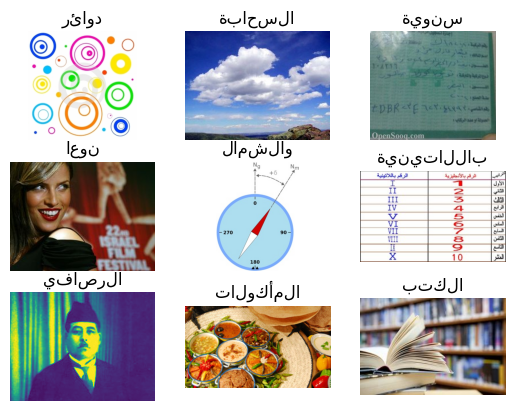

In [59]:
for i, p in enumerate(parent_folders[:9]):
    
    # create a 3x3 figure and place the images accordingly
    ax = plt.subplot(3, 3, i + 1)
    
    # open the images and output to the subplot
    im = Image.open(f'{folder_path}{p}/01.jpg')
    plt.imshow(im)
    
    # add titles above the images and also print them as text
    # as the connected letters are being printed as separate letters
    print(p)
    plt.title(p[::-1]) # partial fixing: https://stackoverflow.com/questions/15421746/matplotlib-writing-right-to-left-text-hebrew-arabic-etc
    plt.axis('off')
    

# Exploratory data analysis to determine image dimension

- Why is this step important? --> because we need to resize images (is square 256x256 better than rectangular images for CNN training??)

In [6]:
# write out all the paths to a csv file
pd.Series(full_paths).to_csv('full_paths.csv', index=False, header=False)

In [7]:
def readchunk(v):
    # this is a wrapper function to     
    # open each image, and return the width and height values
    _img = Image.open(v)
    w, h = _img.size[0], _img.size[1] # width, height and not height, width
    return w, h

In [8]:
# read in the paths and then use the map function to obtain a single list of tuples
# containing the image dimensions
sc_full_paths = sc.textFile('full_paths.csv', minPartitions=partitions)
rdd = sc_full_paths.map(readchunk) # don't use flatMap as it will flatten the resulting list

In [13]:
# create a dataframe out of the list and rename the columns accordingly
rdd_spark = spark.createDataFrame(rdd)

print('before:', rdd_spark.columns)
rdd_spark = rdd_spark.withColumnRenamed('_1', 'width').withColumnRenamed('_2', 'height')
print('after:', rdd_spark.columns)

before: ['_1', '_2']
after: ['width', 'height']


In [14]:
# convert the spark.sql dataframe to a pandas dataframe,
# as the amount of data should be significantly smaller.
rdd_df = rdd_spark.toPandas()
rdd_df.info()

# write out the results to disk for backup
rdd_df.to_parquet('rdd_df_full.pq', index=False)

/home/ubuntu/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/home/ubuntu/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/home/ubuntu/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/home/ubuntu/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/home/ubuntu/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937416 entries, 0 to 937415
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   width   937416 non-null  int64
 1   height  937416 non-null  int64
dtypes: int64(2)
memory usage: 14.3 MB


In [15]:
# notice how metadata from a large dataset can be reduced into a small Pandas dataframe
# for further analysis

In [16]:
rdd_df.head(5)

,width,height
0,256,256
1,256,176
2,256,320
3,256,137
4,256,95


In [17]:
# calculate the frequency of height values
height_counts = rdd_df['height'].value_counts().reset_index()
height_counts.rename(columns={'index': 'height', 'height': 'count'}, inplace=True)
height_counts.head(5)

,height,count
0,192,115201
1,144,83766
2,256,73336
3,171,44868
4,170,27959


In [18]:
# do the same for width values
width_counts = rdd_df['width'].value_counts().reset_index()
width_counts.rename(columns={'index': 'width', 'width': 'count'}, inplace=True)
width_counts.head(5)

,width,count
0,256,895366
1,250,5817
2,220,4601
3,200,3928
4,180,2061


### distribution of width and height counts

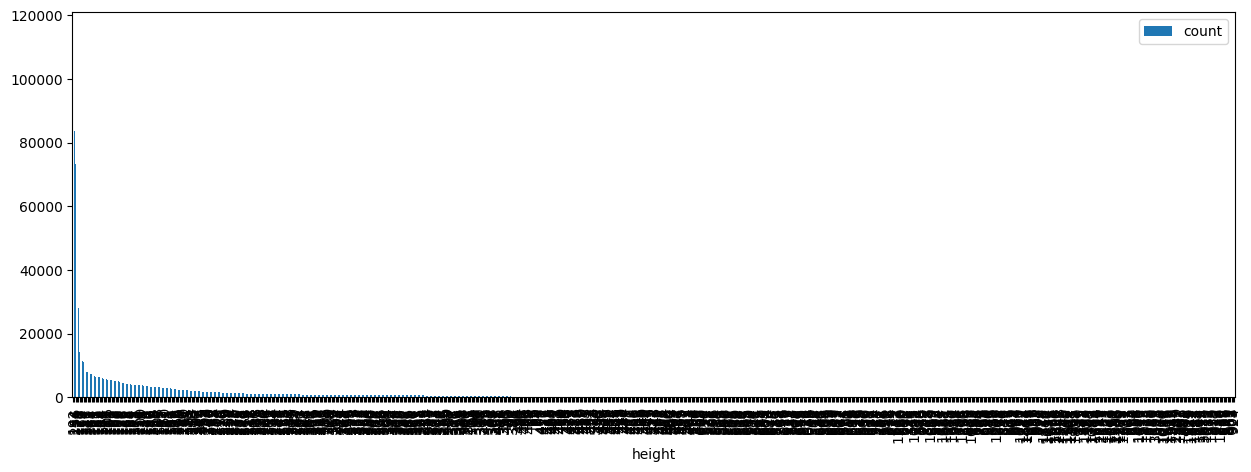

In [26]:
height_counts.plot(x='height', y='count', kind='bar', figsize=(15,5));

# we can see that there is a pareto-like appearance, so let's zoom into the first 20

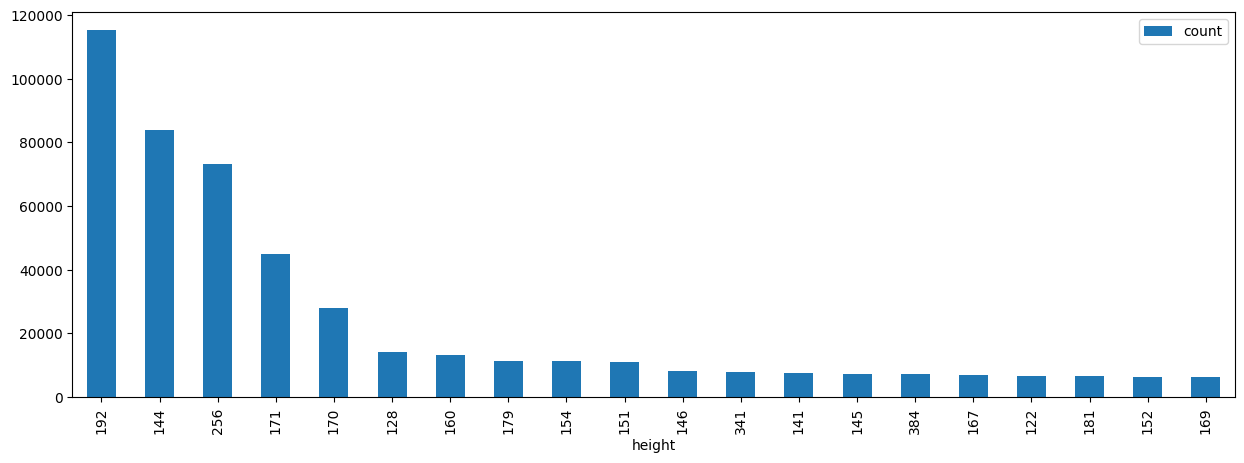

In [21]:
height_counts.iloc[:20].plot(x='height', y='count', kind='bar', figsize=(15,5));

In [30]:
# convert the counts to percentage of the entire dataframe length (i.e. number of images)
height_counts['count_pct'] = height_counts['count'] / rdd_df.shape[0] * 100
height_counts.head(5)

,height,count,count_pct
0,192,115201,12.289208
1,144,83766,8.935841
2,256,73336,7.823208
3,171,44868,4.786349
4,170,27959,2.982561


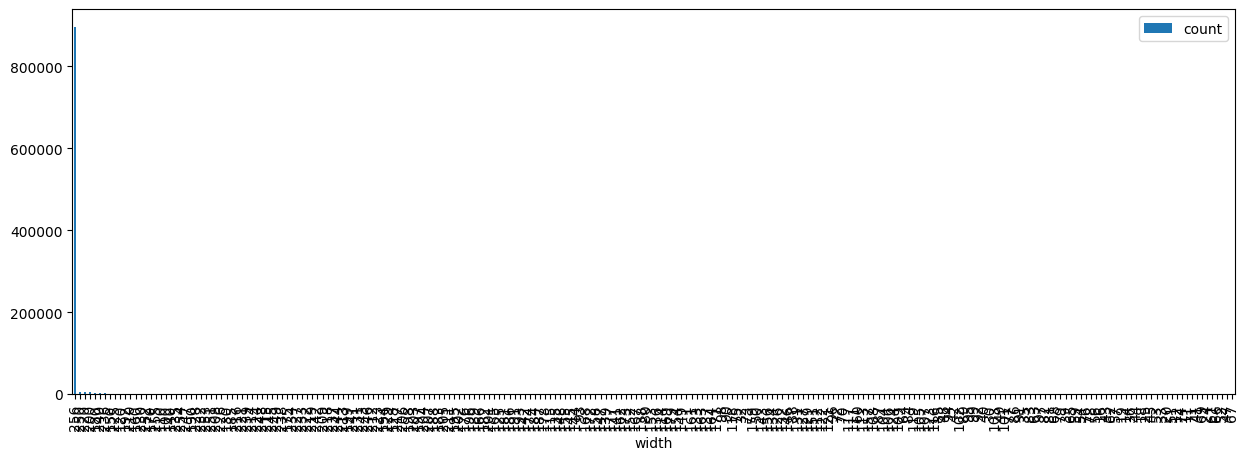

In [23]:
width_counts.plot(x='width', y='count', kind='bar', figsize=(15,5));

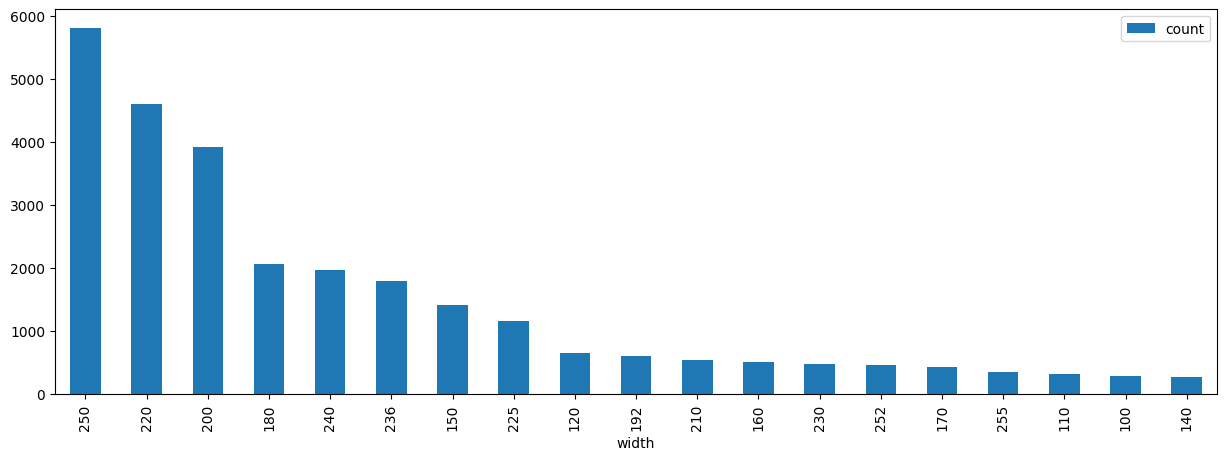

In [25]:
# ignore the first row since its value is more than 100 times larger than the following one
width_counts.iloc[1:20].plot(x='width', y='count', kind='bar', figsize=(15,5));

In [29]:
width_counts['count_pct'] = width_counts['count'] / rdd_df.shape[0] * 100
width_counts.head(5)

,width,count,count_pct
0,256,895366,95.514265
1,250,5817,0.620536
2,220,4601,0.490817
3,200,3928,0.419024
4,180,2061,0.219860


Seems like the bulk of images have a width of 256 pixels (95 %) whereas the height is more evenly and randomly spread. For example, the highest width count if 256 pixels followed by 250 and 220 whereas for the height, it is 192, 144, 256 and 171 pixels in that order.

# 2. CNN using Tensorflow

In this section, convolutional neural network (CNN) will be used to classify images according to their labels.

- Will be using pre-trained models since (i) a lot of research has been done in this area, (ii) these models were trained using large number of images, (iii) save time.
- As was seen at the data processing stage, it is impossible to fit the entire dataset into RAM. Therefore, image generator will be used...
- Move notes from 01_test1 notebook into here.